1. Загрузка и подготовка данных

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Загрузка данных
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Проверка на пропуски
print(X.isnull().sum())  # Пропусков нет

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


2. Обучение моделей

Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))

Linear Regression:
MSE: 2900.193628493481
R²: 0.4526027629719196


SVM (Support Vector Machine)

In [ ]:
from sklearn.svm import SVR

svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\nSVM:")
print("MSE:", mean_squared_error(y_test, y_pred_svm))
print("R²:", r2_score(y_test, y_pred_svm))


SVM:
MSE: 4333.285954518086
R²: 0.18211365770500298


Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("\nDecision Tree:")
print("MSE:", mean_squared_error(y_test, y_pred_tree))
print("R²:", r2_score(y_test, y_pred_tree))


Decision Tree:
MSE: 3656.186930948001
R²: 0.30991275741173785


3. Важность признаков в дереве решений

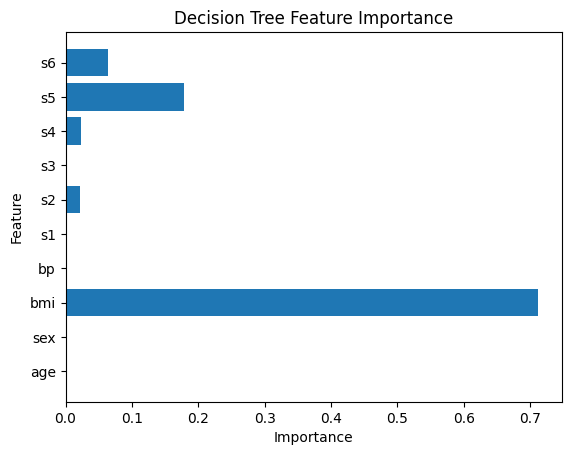

In [ ]:
# График важности признаков
importances = tree.feature_importances_
plt.barh(data.feature_names, importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance")
plt.show()

4. Визуализация дерева решений

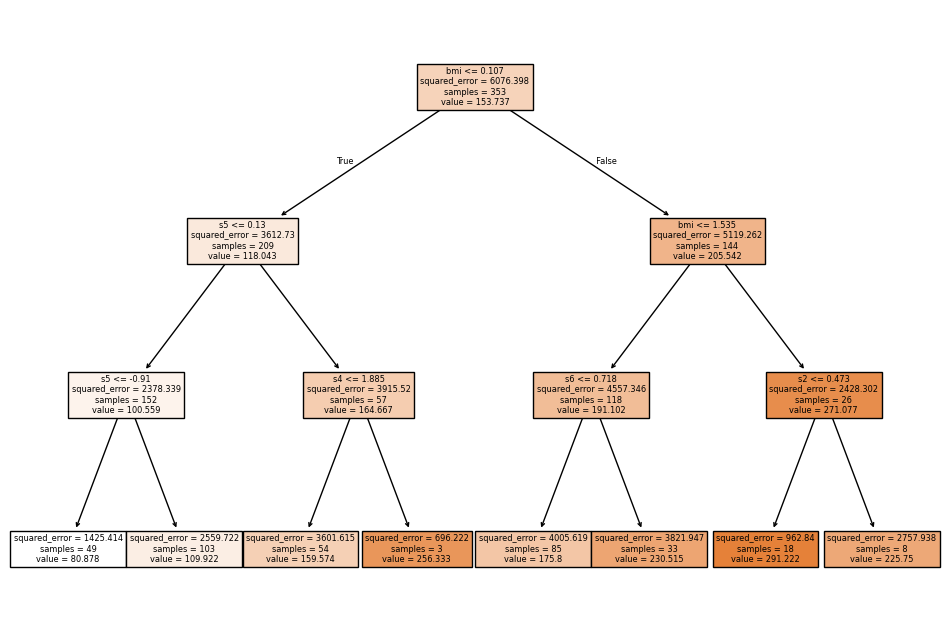

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=data.feature_names)
plt.show()